In [ ]:
# https://github.com/martinmorando/applied-ai/tree/main/001-is-it-a-tree

In [1]:
# Ensure we are using the latest version to avoid problems
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [6]:
# Import required libraries
from fastai.vision.all import *
path = Path("/kaggle/input/ds-tree-or-not")

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path, bs=32)

In [16]:
# Train
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.511261,0.253358,0.026316,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.045418,0.157498,0.026316,00:01
1,0.048284,0.139223,0.026316,00:01
2,0.045733,0.136947,0.026316,00:01


In [19]:
# Export the model 
learn.export("model.pkl")

In [20]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

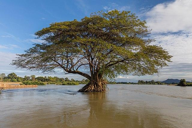

In [21]:
img_data = uploader.value[0]['content'].tobytes()
img = PILImage.create(img_data)
img.to_thumb(192)
# https://commons.wikimedia.org/wiki/File:Flooded_Albizia_Saman_(rain_tree)_in_the_Mekong.jpg
# Basile Morin, CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0, via Wikimedia Commons.

In [22]:
# Predict
predicted_class, predicted_idx, probs = learn.predict(img)

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Print the predicted class index
print(f"Predicted Class Index: {predicted_idx}")

# Print the probabilities for each category
# First, get the order from the vocab object (inside the dataloaders)
categories = learn.dls.vocab
categories
print("Class Probabilities:")
for i, prob in enumerate(probs):
    print(f"{categories[i]}: {prob:.4f} ({prob.item() * 100:.2f}%)")

Predicted Class: tree
Predicted Class Index: 1
Class Probabilities:
airplane: 0.0014 (0.14%)
tree: 0.9986 (99.86%)
